In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv('BankChurners.csv')
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
##columnas de prueba
bank['prueba'] = np.nan
bank['prueba2']= None


# Inciso 1

In [4]:
""""
    Calculando el porcentaje de valores
    nulos en cada columna y excluir en caso
    de ser mayor del 90%
"""
bank_columns = bank.columns
limite = .9
size_bank = bank.shape[0]

for check_column in bank_columns:
    porcentaje = bank.loc[:,check_column].isnull().mean()
    if porcentaje > limite:
        bank.drop(check_column, axis=1, inplace=True)
        print('eliminado', str(check_column) )

eliminado prueba
eliminado prueba2


In [5]:
"""
    Separando las columnas númericas de las categóricas
"""
columns_categories = []
columns_numerics = []

bank_columns = bank.columns
#bank_columns
for c_ in bank_columns:
    if (bank.loc[:,c_].dtype =="int64" or bank.loc[:,c_].dtype =="float64"):
        columns_numerics.append(c_)
    else:
        columns_categories.append(c_)
columns_categories

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [6]:
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [7]:
"""
     Imputando valores de las columas categóricas
 
"""
for c_category in columns_categories:
    if bank.loc[:,c_category].isnull().sum()>0:
        bank.loc[:,c_category] = 'others'
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [8]:
"""
    Estratificando las columna numéricas 
 
"""
for c_numerics in columns_numerics:
    if bank.loc[:,c_numerics].isnull().sum()>0:
        median = bank.loc[:,c_numerics].isnull().median()
        bank.loc[:,c_numerics].fillna(median, inplace=True)
bank


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Inciso 2

## Identificar los datos atípicos y las frecuencias
## Agrupar los datos e identificar medicante el Inter quartile range
## Utilizando el upper_bound y el lower_bound se pueden reemplazar los
## datos atípicos con la media

In [13]:
#Frecuencia Card_Category
bank.loc[ : , ["Card_Category"] ].value_counts()/size_bank

Card_Category
Blue             0.931767
Silver           0.054804
Gold             0.011455
Platinum         0.001975
dtype: float64

In [14]:
#Frecuencia Education_Level
bank.loc[ : , ["Education_Level"] ].value_counts()/size_bank

Education_Level
Graduate           0.308877
High School        0.198776
Unknown            0.149995
Uneducated         0.146835
College            0.100030
Post-Graduate      0.050953
Doctorate          0.044534
dtype: float64

In [15]:
#Frecuencia Marital_Status
bank.loc[ : , ["Marital_Status"] ].value_counts()/size_bank

Marital_Status
Married           0.462822
Single            0.389355
Unknown           0.073961
Divorced          0.073862
dtype: float64

# Columna Total_Amt_Chng_Q4_Q1

{'whiskers': [<matplotlib.lines.Line2D at 0x7f57f5b88950>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7f57f5c59410>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x7f57f5b88350>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x7f57f5c59ed0>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f57f5c5f450>,
  ...],
 'means': []}

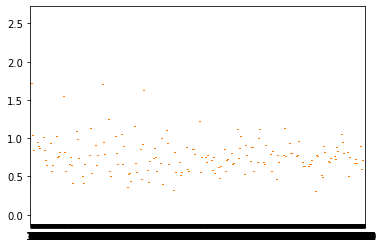

In [12]:
#Datos Atípicos
bank_Total_Amt_Chng_Q4_Q1 = bank.loc[ (bank['Marital_Status'] == 'Married') & (bank['Education_Level'] == 'Graduate') & (bank['Card_Category'] == 'Blue') , ['Total_Amt_Chng_Q4_Q1'] ]
#bank_Total_Amt_Chng_Q4_Q1
plt.boxplot(bank_Total_Amt_Chng_Q4_Q1)

In [18]:
##cuartiles
q1 = np.quantile( bank_Total_Amt_Chng_Q4_Q1 , 0.25 )
q3 = np.quantile( bank_Total_Amt_Chng_Q4_Q1 , 0.75 )

q1,q3

(0.623, 0.8674999999999999)

In [19]:
##media
np.mean(bank_Total_Amt_Chng_Q4_Q1)

Total_Amt_Chng_Q4_Q1    0.767504
dtype: float64

In [20]:
## iqr
## Inter quartile range
iqr = q3 - q1
iqr

0.24449999999999994

In [16]:
bankq1 = bank.loc[ : , ["Education_Level","Marital_Status","Total_Amt_Chng_Q4_Q1"] ].groupby( ["Education_Level","Marital_Status"] , as_index = False ).quantile(0.25)
bankq1.columns = ["Education_Level","Marital_Status","Total_Amt_Chng_Q4_Q1_q1"]

bankq2 = bank.loc[ : , ["Education_Level","Marital_Status","Total_Amt_Chng_Q4_Q1"] ].groupby( ["Education_Level","Marital_Status"] , as_index = False ).quantile(0.5)
bankq2.columns = ["Education_Level","Marital_Status","Total_Amt_Chng_Q4_Q1_q2"]

bankq3 = bank.loc[ : , ["Education_Level","Marital_Status","Total_Amt_Chng_Q4_Q1"] ].groupby( ["Education_Level","Marital_Status"] , as_index = False ).quantile(0.75)
bankq3.columns = ["Education_Level","Marital_Status","Total_Amt_Chng_Q4_Q1_q3"]

In [21]:
bank_iqr = bankq1.merge( bankq3 , on=["Education_Level","Marital_Status"] , how="inner" ).merge( bankq2 , on=["Education_Level","Marital_Status"] , how="inner" )
bank_iqr

,Education_Level,Marital_Status,Total_Amt_Chng_Q4_Q1_q1,Total_Amt_Chng_Q4_Q1_q3,Total_Amt_Chng_Q4_Q1_q2
0,College,Divorced,0.66750,0.83375,0.7445
1,College,Married,0.63600,0.87400,0.7380
2,College,Single,0.62425,0.84125,0.7340
3,College,Unknown,0.61725,0.85400,0.7395
4,Doctorate,Divorced,0.59850,0.85675,0.6950
5,Doctorate,Married,0.61600,0.84800,0.7210
6,Doctorate,Single,0.64250,0.81100,0.7210
7,Doctorate,Unknown,0.62700,0.82875,0.7205
8,Graduate,Divorced,0.63700,0.85100,0.7350
9,Graduate,Married,0.62450,0.86500,0.7340


In [22]:
bank_iqr["iqr"] = bank_iqr.apply( lambda r: r["Total_Amt_Chng_Q4_Q1_q3"] - r["Total_Amt_Chng_Q4_Q1_q1"] , axis = 1)

In [23]:
bank_iqr.head(3)

,Education_Level,Marital_Status,Total_Amt_Chng_Q4_Q1_q1,Total_Amt_Chng_Q4_Q1_q3,Total_Amt_Chng_Q4_Q1_q2,iqr
0,College,Divorced,0.66750,0.83375,0.7445,0.16625
1,College,Married,0.63600,0.87400,0.7380,0.23800
2,College,Single,0.62425,0.84125,0.7340,0.21700


In [24]:
bank_iqr["upper"] = bank_iqr.apply( lambda r: ( r["Total_Amt_Chng_Q4_Q1_q3"] + 1.5*r["iqr"] ) , axis = 1)
bank_iqr["lower"] = bank_iqr.apply( lambda r: ( r["Total_Amt_Chng_Q4_Q1_q1"] - 1.5*r["iqr"] ) , axis = 1)
bank_iqr.head(3)

,Education_Level,Marital_Status,Total_Amt_Chng_Q4_Q1_q1,Total_Amt_Chng_Q4_Q1_q3,Total_Amt_Chng_Q4_Q1_q2,iqr,upper,lower
0,College,Divorced,0.66750,0.83375,0.7445,0.16625,1.083125,0.418125
1,College,Married,0.63600,0.87400,0.7380,0.23800,1.231000,0.279000
2,College,Single,0.62425,0.84125,0.7340,0.21700,1.166750,0.298750


In [25]:
bank_copy = bank.merge( bank_iqr , on=["Education_Level","Marital_Status"] , how="left" ).copy()
bank_copy

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Total_Amt_Chng_Q4_Q1_q1,Total_Amt_Chng_Q4_Q1_q3,Total_Amt_Chng_Q4_Q1_q2,iqr,upper,lower
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,0.000093,0.999910,0.63500,0.87900,0.757,0.2440,1.24500,0.26900
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,0.000057,0.999940,0.63900,0.84600,0.732,0.2070,1.15650,0.32850
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0.000021,0.999980,0.62450,0.86500,0.734,0.2405,1.22575,0.26375
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0.000134,0.999870,0.65000,0.87350,0.766,0.2235,1.20875,0.31475
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0.000022,0.999980,0.62075,0.88225,0.743,0.2615,1.27450,0.22850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.857,0.462,0.000191,0.999810,0.63900,0.84600,0.732,0.2070,1.15650,0.32850
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.683,0.511,0.995270,0.004729,0.59700,0.88950,0.729,0.2925,1.32825,0.15825
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.818,0.000,0.997880,0.002118,0.63500,0.87900,0.757,0.2440,1.24500,0.26900
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.722,0.000,0.996710,0.003294,0.62650,0.84800,0.731,0.2215,1.18025,0.29425


In [26]:
def getRealTotal_Amt_Chng_Q4(r):
    if ( r["Total_Amt_Chng_Q4_Q1"] <= r["lower"] ) | ( r["Total_Amt_Chng_Q4_Q1"] >= r["upper"] ):
        return r["Total_Amt_Chng_Q4_Q1_q2"]
    else:
        return r["Total_Amt_Chng_Q4_Q1"]

In [27]:
bank_copy["NEW_Total_Amt_Chng_Q4_Q1"] = bank_copy.apply( lambda r: getRealTotal_Amt_Chng_Q4(r) , axis = 1 )
bank_copy.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Total_Amt_Chng_Q4_Q1_q1,Total_Amt_Chng_Q4_Q1_q3,Total_Amt_Chng_Q4_Q1_q2,iqr,upper,lower,NEW_Total_Amt_Chng_Q4_Q1
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.061,0.000093,0.99991,0.63500,0.87900,0.757,0.2440,1.24500,0.26900,0.757
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.105,0.000057,0.99994,0.63900,0.84600,0.732,0.2070,1.15650,0.32850,0.732
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.000,0.000021,0.99998,0.62450,0.86500,0.734,0.2405,1.22575,0.26375,0.734
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.760,0.000134,0.99987,0.65000,0.87350,0.766,0.2235,1.20875,0.31475,0.766
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.000,0.000022,0.99998,0.62075,0.88225,0.743,0.2615,1.27450,0.22850,0.743


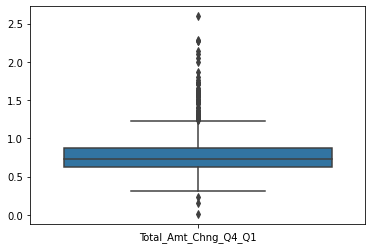

In [28]:

sns.boxplot( data=bank_copy.loc[ (bank_copy['Marital_Status'] == 'Married') & (bank_copy['Education_Level'] == 'Graduate') & (bank_copy['Card_Category'] == 'Blue') , ['Total_Amt_Chng_Q4_Q1'] ]
   )

# Columna Total_Trans_Amt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f57c812bed0>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7f57c822c990>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x7f57c812b8d0>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x7f57c8229b90>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f57c8229650>,
  ...],
 'means': []}

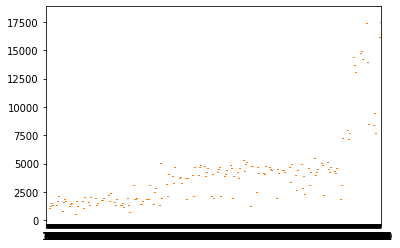

In [82]:
#Datos Atípicos
bank_Total_Trans_Amt = bank.loc[ (bank['Marital_Status'] == 'Married') & (bank['Education_Level'] == 'Graduate') & (bank['Card_Category'] == 'Blue') , ['Total_Trans_Amt'] ]
#bank_Total_Trans_Amt
plt.boxplot(bank_Total_Trans_Amt)

In [83]:
##cuartiles
q1 = np.quantile( bank_Total_Trans_Amt , 0.25 )
q3 = np.quantile( bank_Total_Trans_Amt , 0.75 )

q1,q3

(1805.0, 4621.0)

In [84]:
bankq1 = bank.loc[ : , ["Education_Level","Marital_Status","Total_Trans_Amt"] ].groupby( ["Education_Level","Marital_Status"] , as_index = False ).quantile(0.25)
bankq1.columns = ["Education_Level","Marital_Status","Total_Trans_Amt_q1"]

bankq2 = bank.loc[ : , ["Education_Level","Marital_Status","Total_Trans_Amt"] ].groupby( ["Education_Level","Marital_Status"] , as_index = False ).quantile(0.5)
bankq2.columns = ["Education_Level","Marital_Status","Total_Trans_Amt_q2"]

bankq3 = bank.loc[ : , ["Education_Level","Marital_Status","Total_Trans_Amt"] ].groupby( ["Education_Level","Marital_Status"] , as_index = False ).quantile(0.75)
bankq3.columns = ["Education_Level","Marital_Status","Total_Trans_Amt_q3"]

In [85]:
bank_iqr = bankq1.merge( bankq3 , on=["Education_Level","Marital_Status"] , how="inner" ).merge( bankq2 , on=["Education_Level","Marital_Status"] , how="inner" )
bank_iqr

,Education_Level,Marital_Status,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_q2
0,College,Divorced,2522.50,4539.75,3726.0
1,College,Married,1943.00,4725.00,3801.0
2,College,Single,2469.50,4729.75,3980.0
3,College,Unknown,2148.00,5006.50,4267.0
4,Doctorate,Divorced,2197.00,4855.25,3775.0
5,Doctorate,Married,1973.00,4512.00,3146.0
6,Doctorate,Single,2566.50,4619.25,3877.0
7,Doctorate,Unknown,2254.50,4458.50,4136.5
8,Graduate,Divorced,2462.00,4735.00,3922.0
9,Graduate,Married,1830.50,4731.50,3578.0


In [86]:
bank_iqr["iqr"] = bank_iqr.apply( lambda r: r["Total_Trans_Amt_q3"] - r["Total_Trans_Amt_q1"] , axis = 1)

In [87]:
bank_iqr["upper"] = bank_iqr.apply( lambda r: ( r["Total_Trans_Amt_q3"] + 1.5*r["iqr"] ) , axis = 1)
bank_iqr["lower"] = bank_iqr.apply( lambda r: ( r["Total_Trans_Amt_q1"] - 1.5*r["iqr"] ) , axis = 1)
bank_iqr.head(3)

,Education_Level,Marital_Status,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_q2,iqr,upper,lower
0,College,Divorced,2522.5,4539.75,3726.0,2017.25,7565.625,-503.375
1,College,Married,1943.0,4725.00,3801.0,2782.00,8898.000,-2230.000
2,College,Single,2469.5,4729.75,3980.0,2260.25,8120.125,-920.875


In [88]:
bank_copy = bank.merge( bank_iqr , on=["Education_Level","Marital_Status"] , how="left" ).copy()
bank_copy

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_q2,iqr,upper,lower
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,0.000093,0.999910,1802.00,4623.00,3355.0,2821.00,8854.500,-2429.500
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,0.000057,0.999940,2502.00,4791.00,4011.0,2289.00,8224.500,-931.500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0.000021,0.999980,1830.50,4731.50,3578.0,2901.00,9083.000,-2521.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0.000134,0.999870,2428.00,4839.75,4095.0,2411.75,8457.375,-1189.625
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0.000022,0.999980,1842.75,4738.50,3592.5,2895.75,9082.125,-2500.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.857,0.462,0.000191,0.999810,2502.00,4791.00,4011.0,2289.00,8224.500,-931.500
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.683,0.511,0.995270,0.004729,1989.00,4464.00,3449.5,2475.00,8176.500,-1723.500
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.818,0.000,0.997880,0.002118,1802.00,4623.00,3355.0,2821.00,8854.500,-2429.500
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.722,0.000,0.996710,0.003294,2531.50,4949.00,4255.0,2417.50,8575.250,-1094.750


In [89]:
def getRealTotal_Trans_Amt(r):
    if ( r["Total_Trans_Amt"] <= r["lower"] ) | ( r["Total_Trans_Amt"] >= r["upper"] ):
        return r["Total_Trans_Amt_q2"]
    else:
        return r["Total_Trans_Amt"]

In [90]:
bank_copy["NEW_Total_Trans_Amt"] = bank_copy.apply( lambda r: getRealTotal_Trans_Amt(r) , axis = 1 )
bank_copy.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_q2,iqr,upper,lower,NEW_Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.061,0.000093,0.99991,1802.00,4623.00,3355.0,2821.00,8854.500,-2429.500,1144.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.105,0.000057,0.99994,2502.00,4791.00,4011.0,2289.00,8224.500,-931.500,1291.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.000,0.000021,0.99998,1830.50,4731.50,3578.0,2901.00,9083.000,-2521.000,1887.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.760,0.000134,0.99987,2428.00,4839.75,4095.0,2411.75,8457.375,-1189.625,1171.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.000,0.000022,0.99998,1842.75,4738.50,3592.5,2895.75,9082.125,-2500.875,816.0


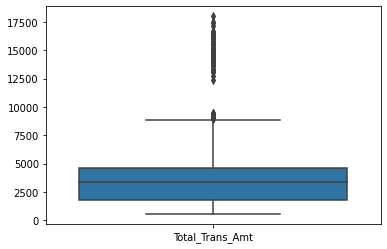

In [91]:
sns.boxplot( data=bank_copy.loc[ (bank_copy['Marital_Status'] == 'Married') & (bank_copy['Education_Level'] == 'Graduate') & (bank_copy['Card_Category'] == 'Blue') , ['Total_Trans_Amt'] ]
   )

# Inciso 3

In [92]:
target = .95

valid_columns = []
many_levels_columns = []
one_level_column = []

target = .95
size_bank = bank.shape[0]

for c_ in columns_categories:
    levels = bank.loc[:,c_].drop_duplicates().shape[0]
    print('levels', levels)

    if (levels/size_bank) > target:
        many_levels_columns.append(c_)
    elif levels == 1:
        one_level_column.append(c_)
    else:
        valid_columns.append(c_)

levels 2
levels 2
levels 7
levels 4
levels 6
levels 4


In [93]:
valid_columns

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

# Tratamiento de la  columna Attrition_Flag

In [77]:
#agrupamos los datos de la columna

level_Attrition_Flag = bank.groupby('Attrition_Flag',as_index=False).agg({'CLIENTNUM':'count'})


##Porcentaje de la columna
level_Attrition_Flag['percentage'] = level_Attrition_Flag['CLIENTNUM'] / size_bank 
level_Attrition_Flag = level_Attrition_Flag.sort_values(['percentage'], ascending=False)

#
level_Attrition_Flag['Attrition_Flag_Others'] = 'Others'
lambda_function = lambda r: r['Attrition_Flag'] if r['percentage'] > 0.83 else r['Attrition_Flag_Others']

level_Attrition_Flag['Attrition_Flag_Others'] = level_Attrition_Flag.apply(lambda_function, axis=1)

level_Attrition_Flag = level_Attrition_Flag.loc[:,['Attrition_Flag','Attrition_Flag_Others']]

level_Attrition_Flag_bank = bank.merge(level_Attrition_Flag, on=['Attrition_Flag'], how='left')
level_Attrition_Flag_bank.to_csv('level_Attrition_Flag_bank_rules.csv')


## Tratamiento de la columna Gender

In [78]:
#agrupamos los datos de la columna

level_Gender = bank.groupby('Gender',as_index=False).agg({'CLIENTNUM':'count'})


##Porcentaje de la columna
level_Gender['percentage'] = level_Gender['CLIENTNUM'] / bank.shape[0]
level_Gender = level_Gender.sort_values(['percentage'], ascending=False)

#
level_Gender['Gender_Others'] = 'Others'
lambda_function = lambda r: r['Gender'] if r['percentage'] > 0.52 else r['Gender_Others']

level_Gender['Gender_Others'] = level_Gender.apply(lambda_function, axis=1)

level_Gender = level_Gender.loc[:,['Gender','Gender_Others']]

level_Gender = bank.merge(level_Gender, on=['Gender'], how='left')
level_Gender.to_csv('level_Gender_bank_rules.csv')


# Tratamiento de la columna Education_Level


In [76]:
#agrupamos los datos de la columna

level_Education_Level = bank.groupby('Education_Level',as_index=False).agg({'CLIENTNUM':'count'})

##Porcentaje de la columna
level_Education_Level['percentage'] = level_Education_Level['CLIENTNUM'] / bank.shape[0]
level_Education_Level = level_Education_Level.sort_values(['percentage'], ascending=False)

#
level_Education_Level['Education_Level_Others'] = 'Others'
lambda_function = lambda r: r['Education_Level'] if r['percentage'] > 0.14 else r['Education_Level_Others']

level_Education_Level['Education_Level_Others'] = level_Education_Level.apply(lambda_function, axis=1)

level_Education_Level = level_Education_Level.loc[:,['Education_Level','Education_Level_Others']]

level_Education_Level_bank = bank.merge(level_Education_Level, on=['Education_Level'], how='left')
level_Education_Level_bank.to_csv('level_Education_Level_bank_rules.csv')

# Tratamiento de la columna Marital_Status

In [81]:
#agrupamos los datos de la columna

level_Marital_Status = bank.groupby('Marital_Status',as_index=False).agg({'CLIENTNUM':'count'})


##Porcentaje de la columna
level_Marital_Status['percentage'] = level_Marital_Status['CLIENTNUM'] / bank.shape[0]
level_Marital_Status = level_Marital_Status.sort_values(['percentage'], ascending=False)

#
level_Marital_Status['Marital_Status_Others'] = 'Others'
lambda_function = lambda r: r['Marital_Status'] if r['percentage'] > 0.38 else r['Marital_Status_Others']

level_Marital_Status['Marital_Status_Others'] = level_Marital_Status.apply(lambda_function, axis=1)

level_Marital_Status = level_Marital_Status.loc[:,['Marital_Status','Marital_Status_Others']]

level_Marital_Status_bank = bank.merge(level_Marital_Status, on=['Marital_Status'], how='left')
level_Marital_Status_bank.to_csv('level_Marital_Status_bank_rules.csv')

# Tratamiento de la columna Income_Category

In [74]:
#agrupamos los datos de la columna

level_Income_Category = bank.groupby('Income_Category',as_index=False).agg({'CLIENTNUM':'count'})


##Porcentaje de la columna
level_Income_Category['percentage'] = level_Income_Category['CLIENTNUM'] / bank.shape[0]
level_Income_Category = level_Income_Category.sort_values(['percentage'], ascending=False)

#
level_Income_Category['Income_Category_Others'] = 'Others'
lambda_function = lambda r: r['Income_Category'] if r['percentage'] > 0.13 else r['Income_Category_Others']

level_Income_Category['Income_Category_Others'] = level_Income_Category.apply(lambda_function, axis=1)

level_Income_Category = level_Income_Category.loc[:,['Income_Category','Income_Category_Others']]

level_Income_Category_bank = bank.merge(level_Income_Category, on=['Income_Category'], how='left')
level_Income_Category_bank.to_csv('level_Income_Category_bank_rules.csv')

# Tratamiento de la columna Card_Category

In [94]:
#agrupamos los datos de la columna

level_Card_Category = bank.groupby('Card_Category',as_index=False).agg({'CLIENTNUM':'count'})


##Porcentaje de la columna
level_Card_Category['percentage'] = level_Card_Category['CLIENTNUM'] / bank.shape[0]
level_Card_Category = level_Card_Category.sort_values(['percentage'], ascending=False)

#
level_Card_Category['Card_Category_Others'] = 'Others'
lambda_function = lambda r: r['Card_Category'] if r['percentage'] > 0.93 else r['Card_Category_Others']

level_Card_Category['Card_Category_Others'] = level_Card_Category.apply(lambda_function, axis=1)

level_Card_Category = level_Card_Category.loc[:,['Card_Category','Card_Category_Others']]

level_Card_Category_bank = bank.merge(level_Card_Category, on=['Card_Category'], how='left')
level_Card_Category_bank.to_csv('level_Card_Category_bank_rules.csv')